### DSCI Final Project
Group 008 - 38: Cove Beaven, Sydney Blackwell, Talia Chan, Ryan Han

### Introduction

A surge in online multiplayer games has led to an increase in the demand for research on player behaviors and server resource management. A research project in the Computer Science department at the University of British Columbia is aiming to address this need through PlaiCraft, a Minecraft server created specifically for this purpose. In this research project, the server is used to track and analyze player behavior in order to answer critical questions that can optimize server usage and recruitment strategies for future player engagement. The data gathered is as follows:

sessions.csv contains details about every gaming session. There are 5 total variables and 1535 observations. players.csv contains player demographics and attributes for each player. There are 9 variables and 96 observations.

- hashedEmail anonymizes the player's email and is a String. A possible error is that there are duplicate sessions for the same user.
- start_time and end_time are of type DateTime and indicate the start time/end time of the session (DD/MM/YYYY HH). The times don't account for timezones which may be a potential error.
- original_start_time and original_end_time are Numeric and is the Unix timestamp for session start/end times. The number of digits given is not specific enough to get any difference between the two columns.
  
- experience is Categorical and provides the level of player experience.
- Subscribe is a Boolean and indicates if the payer is subscribed to Plaicrafts emails
- hashedEmail
- played_hours is Numeric and provides the total hours played by the player
- name is a String
- gender is Categorical
- individualId and organizationName are type string, but these variables are missing many values so may be negligible.

The question I will be seeking to answer is: Which player demographics (age, subscription, gender, playtimes) are the best predictors for the highest session count per player?

The response variable will be the session count per player, and the explanatory variables will age, gender, experience, subscription status, and total playtime. The goal will be to find which of the explanatory variables (in combination, or individually) have the strongest correlation with total session count. The response variable is the total session count as it each session provides rich data including start and end times. The chosen explanatory variables — age, gender, experience, subscription status, and total playtime—are likely to influence the response variable due to their inherent connection to gaming behaviour and engagement patterns. Age can reflect differences in gaming preferences and time availability, gender might influence engagement patterns due to differences in gaming preference, experience is an indicator of familiarity with the game and gaming, subscription status can be an indicator of the  level of engagement, and total playtime has possibilities of being directly related to session count. 


### Methods and Results

The first step is to load in the required models for analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, the data is imported and read.

In [2]:
# URLs for data
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

# Reading the data
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In terms of wrangling, the two datasets should be merged using hashedEmail, and use group_by and summarize to give the session count for each player. From here, visualizations representing the relationship between reponse and explanatory variables can be made

Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


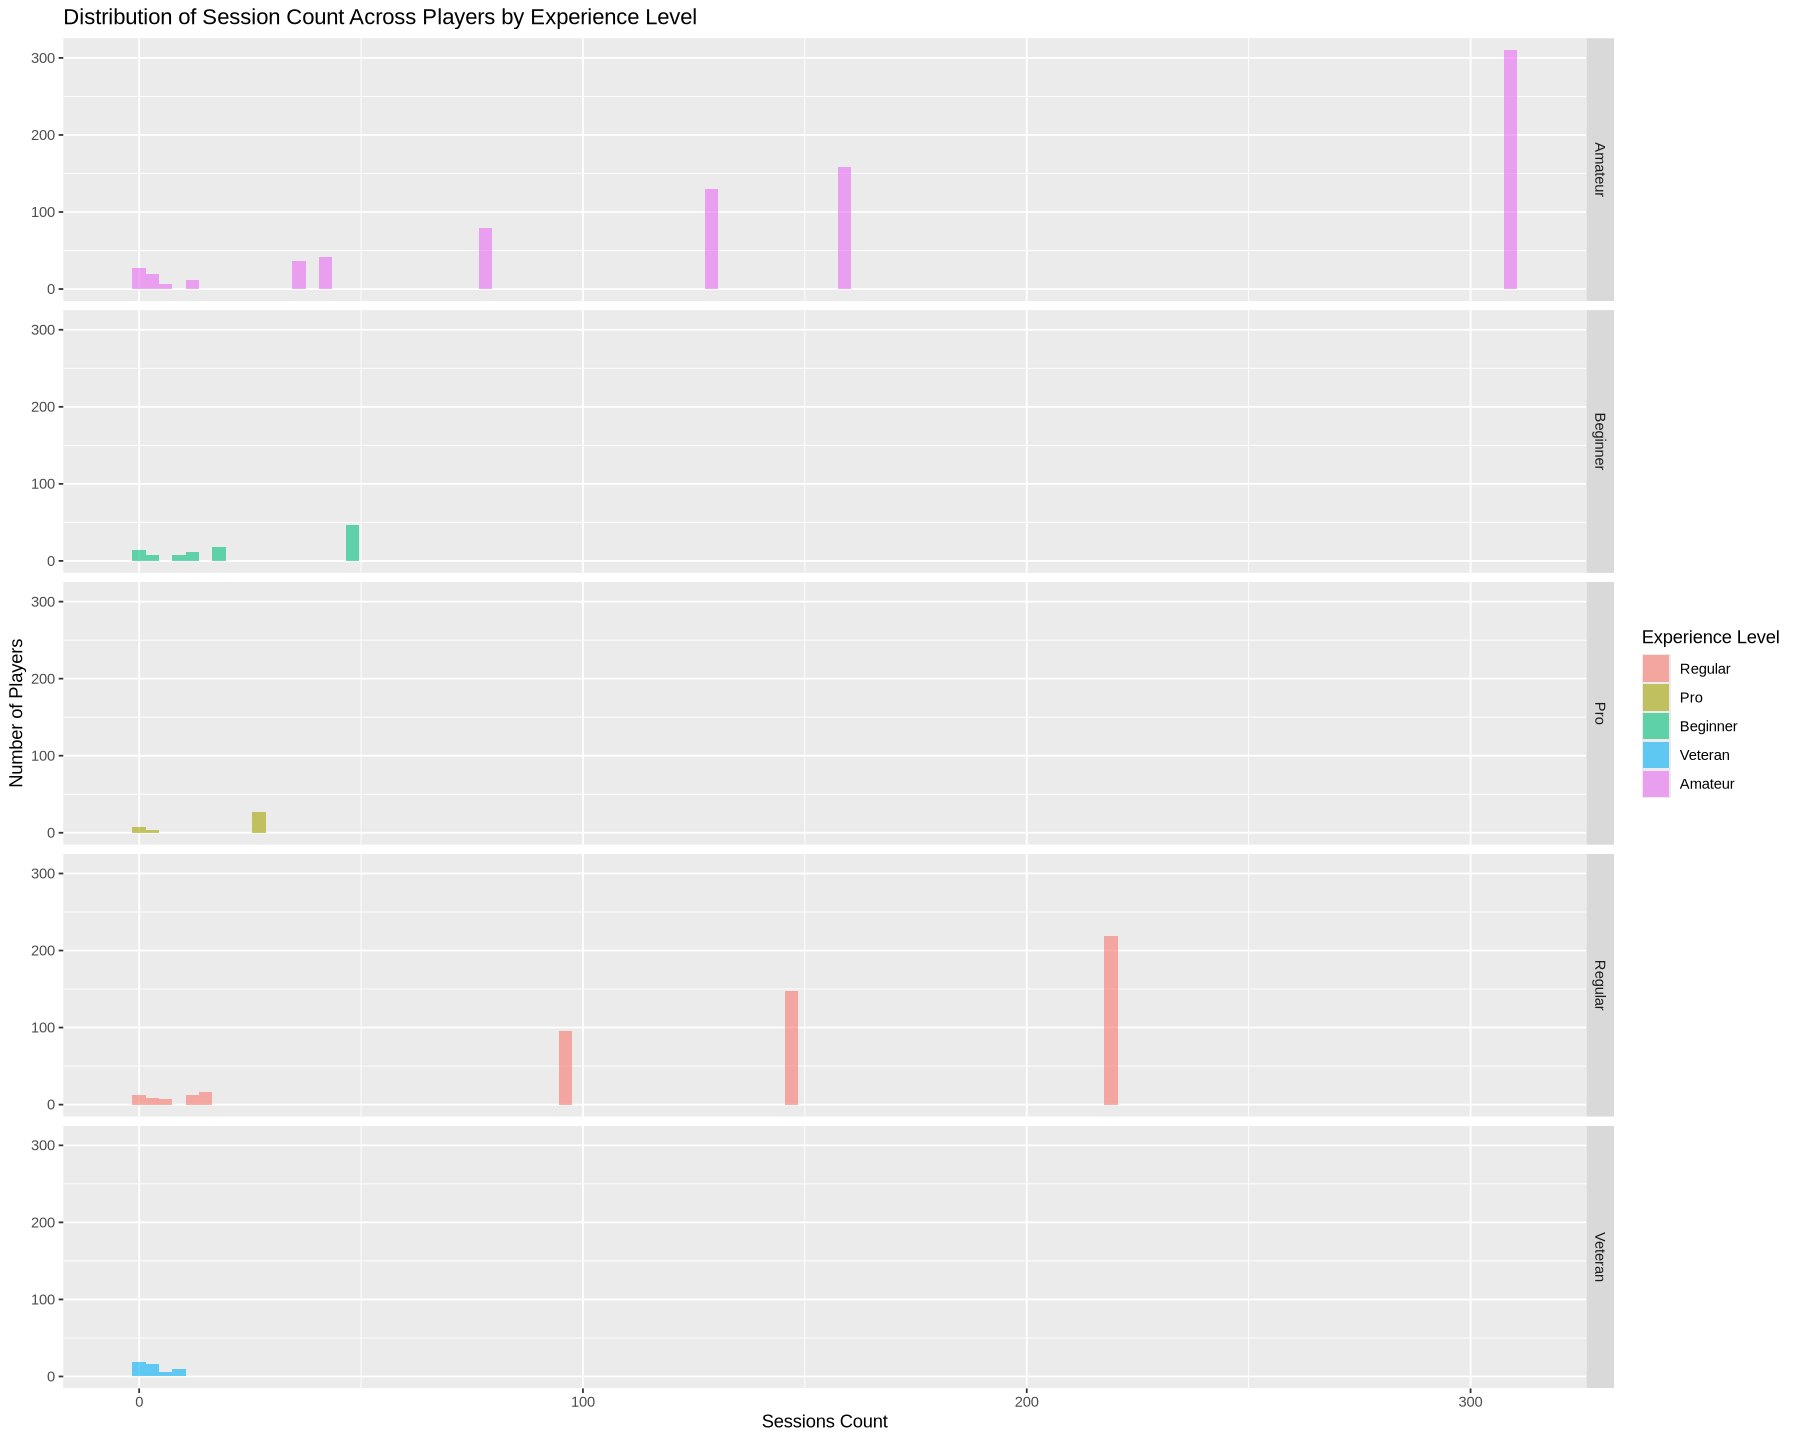

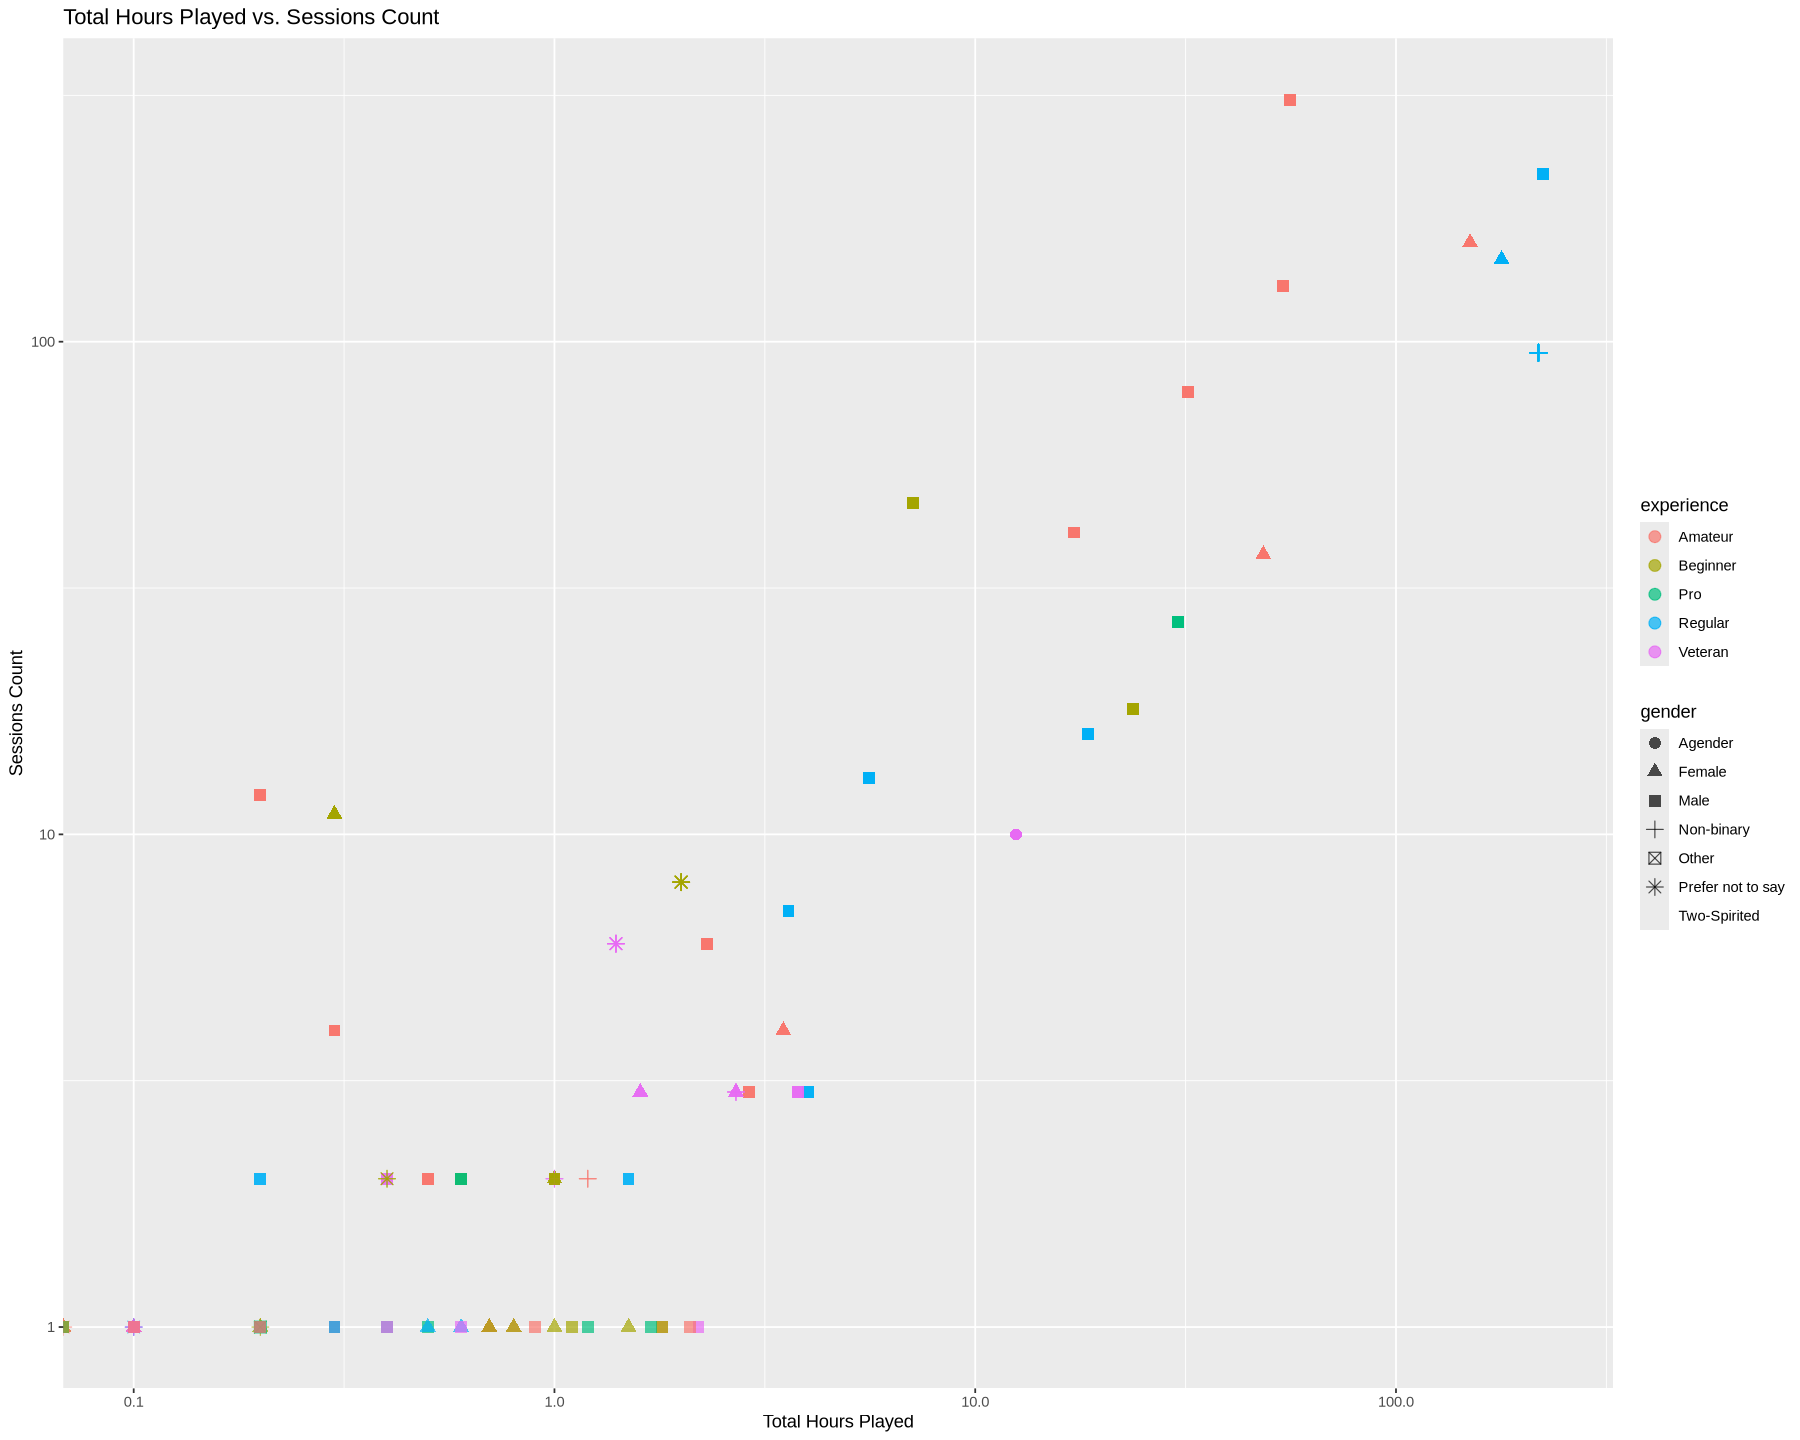

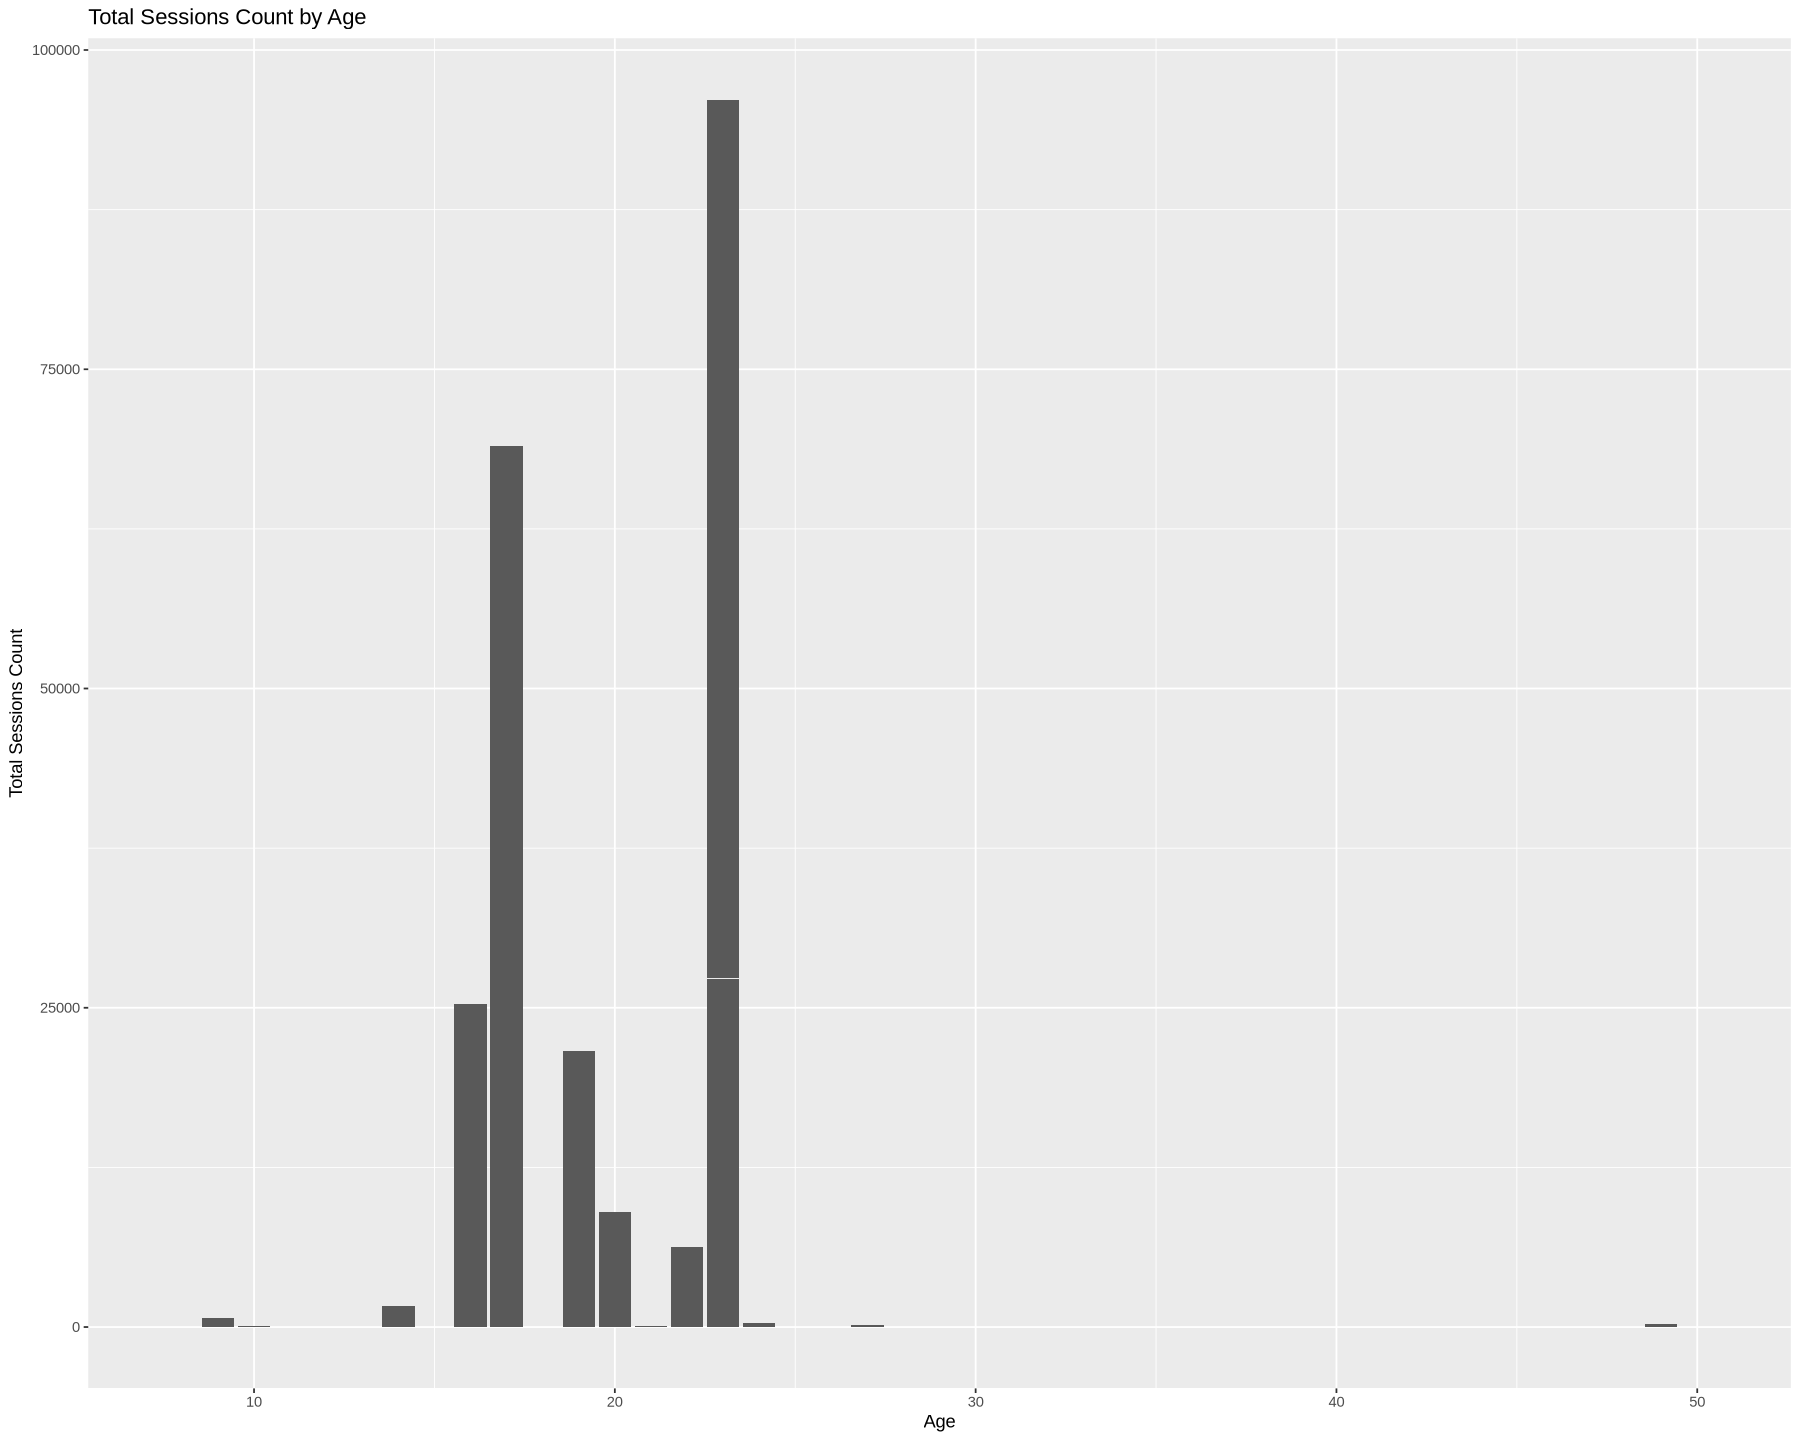

In [40]:
# Merging datasets on hashedEmail
combined_data <- merge(sessions, players, by = "hashedEmail")

# Selecting columns needed for analysis
filtered_data <- combined_data |>
  select(hashedEmail, start_time, end_time, age, gender, experience, subscribe, played_hours)   

# Grouping by player and calculating the total number of sessions
session_counts <- filtered_data |>
  group_by(hashedEmail) |>
  summarize(sessionsCount = n())

# Merging session counts with filtered data
player_session_data <- merge(session_counts, filtered_data, by = "hashedEmail")

# Histogram session count distribution, split by experience level
session_hist <- ggplot(player_session_data, aes(x = sessionsCount, fill = as_factor(experience))) +
  geom_histogram(binwidth = 3, alpha = 0.6, position = "identity") +
  labs(title = "Distribution of Session Count Across Players by Experience Level",
       x = "Sessions Count",
       y = "Number of Players",
       fill = "Experience Level") +
  facet_grid(rows = vars(experience)) 

# Scatterplot of total hours played vs session count by experience and gender
session_hours_scatterplot <- ggplot(player_session_data, aes(x = played_hours, y = sessionsCount, color = experience, shape = gender)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Total Hours Played vs. Sessions Count",
       x = "Total Hours Played",
       y = "Sessions Count") +
  scale_x_log10(labels = label_comma()) +
  scale_y_log10(labels = label_comma())

# Bar plot of total sessions count by age filtered for ages below 60
age_session_barplot <- player_session_data |> 
  filter(age < 60) |>
  ggplot(aes(x = age, y = sessionsCount)) +
    geom_bar(stat = "identity") +
    labs(title = "Total Sessions Count by Age",
       x = "Age",
       y = "Total Sessions Count") 

session_hist
session_hours_scatterplot
age_session_barplot

From the vizualizations, we can draw the following conclusions: 
- There is a positive linear relationship between total hours played and total sessions 
- Lots of amateaur players that have high session counts 
- Age 15-25 has the most total sessions by a significant amount; age 23 has the most play counts.

We can explore a more thorough relationship of the variables with sessionsCount using a ggplairs plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


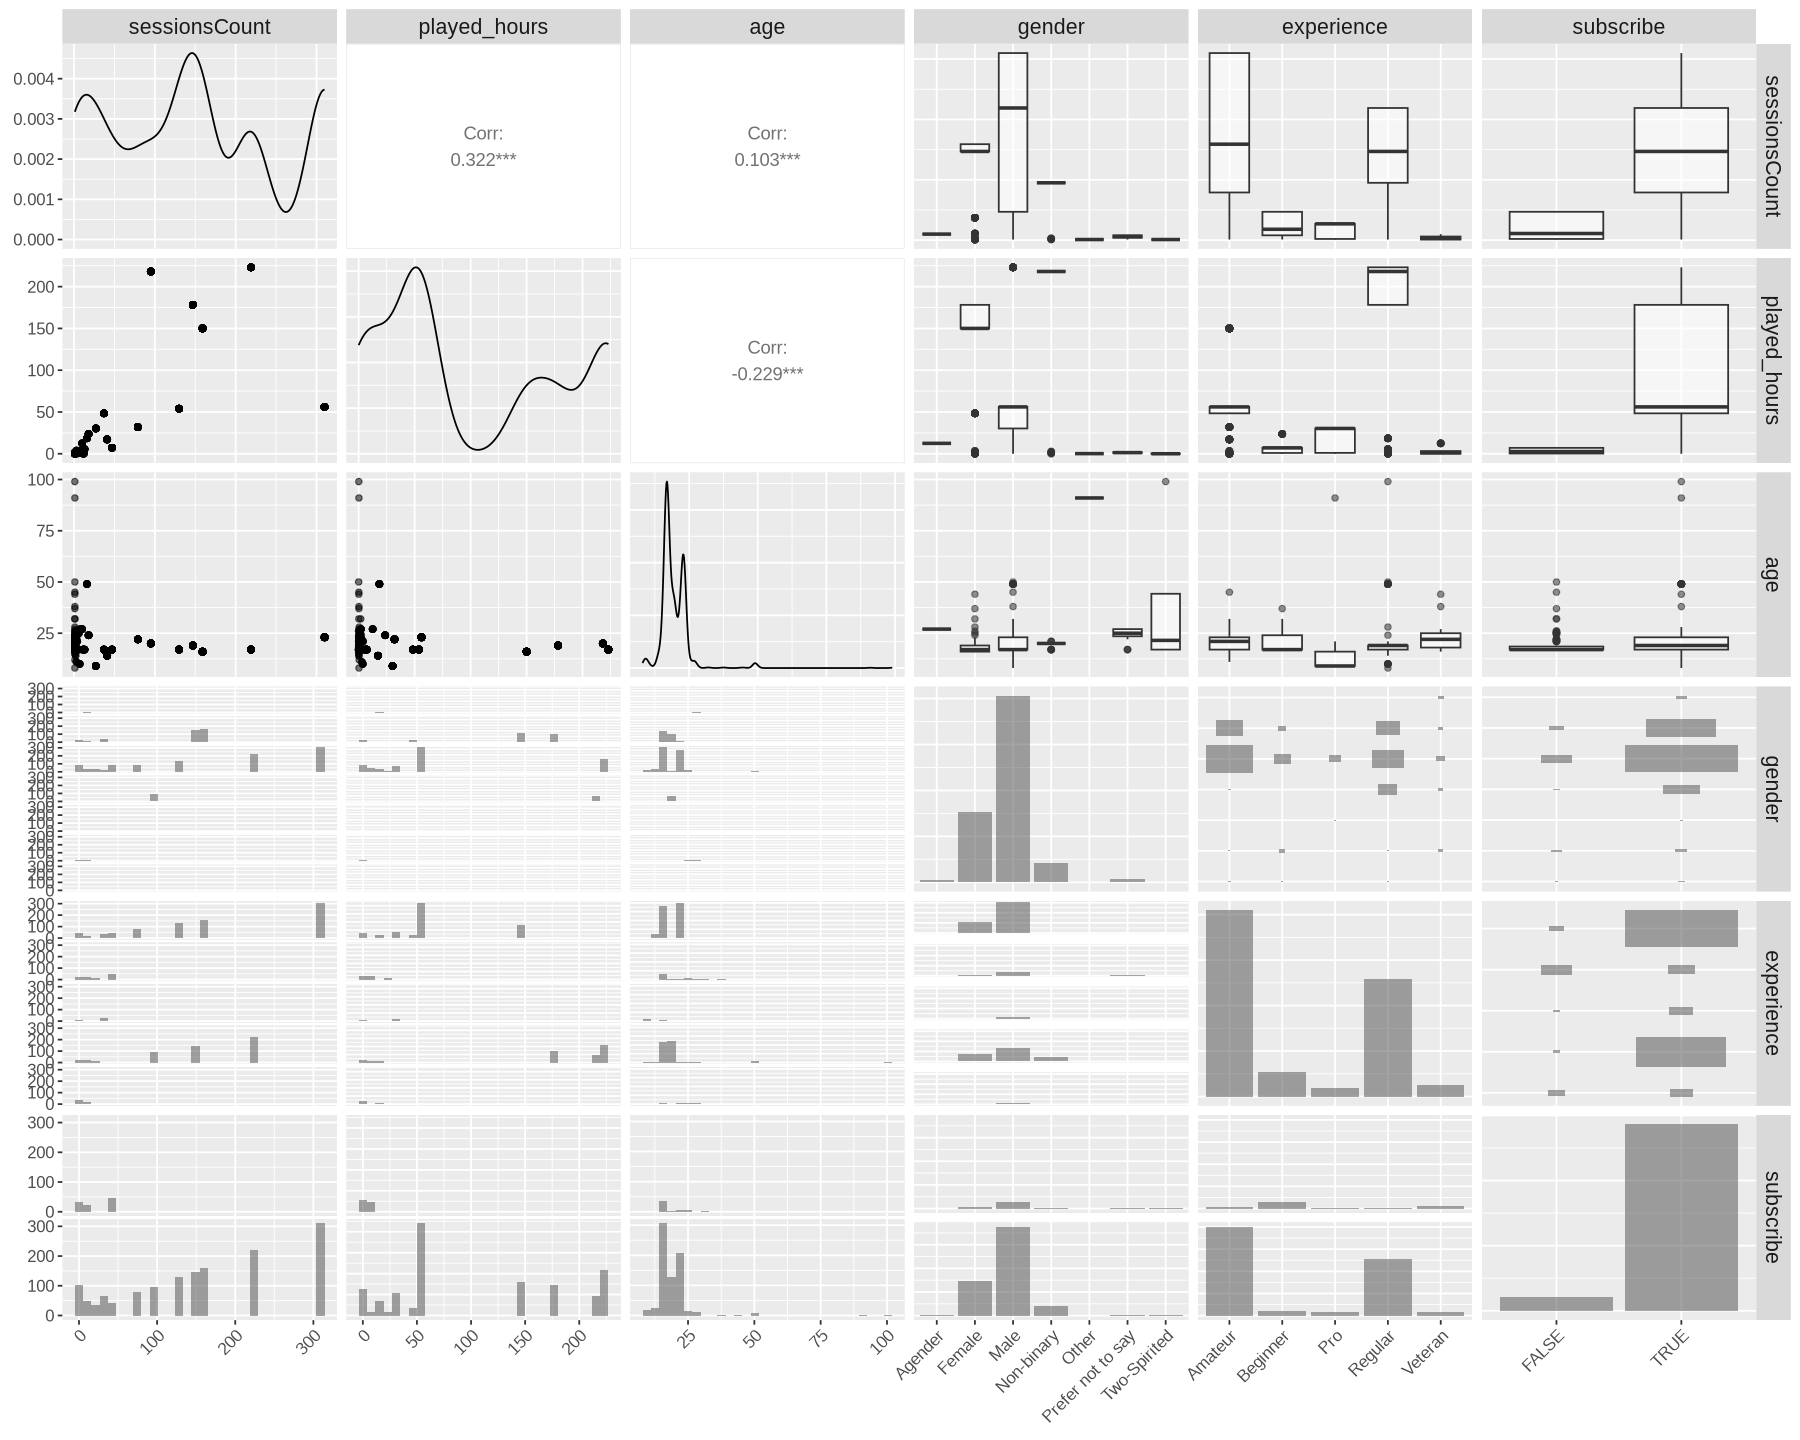

In [53]:
# Set categorical variables as factors
ggpairs_data <- player_session_data |>
  mutate(
    gender = as.factor(gender),
    experience = as.factor(experience),
    subscribe = as.factor(subscribe)
  ) |>
  select(sessionsCount, played_hours, age, gender, experience, subscribe)


options(repr.plot.width = 15, repr.plot.height = 12)

pair_plot <- ggpairs_data |> 
  ggpairs(mapping = aes(alpha = 0.4)) +
  theme(
    text = element_text(size = 16),  # Adjust overall text size
    axis.text.x = element_text(size = 10, angle = 45, hjust = 1),  # Rotate x-axis labels for readability
    axis.text.y = element_text(size = 10)  # Reduce y-axis text size
  )

pair_plot



We can draw further conclusions with subscription status and gender:
- There is a significant increase in session count if players are subscribed
- Although high in variance, males have a higher session count average

Thus, the visualizations affirm that there are potential relationships between the explanatory variables and the response variable. By performing multivariate linear regression, to calculate the RMSE, which represents the average magnitude of the prediction error. The data will be split into an 80-20 training and testing set.

In [92]:
set.seed(10)

# Prepare data
player_session_data <- player_session_data |>
  mutate(gender = as.factor(gender), 
         experience = as.factor(experience), 
         subscribe = as.factor(subscribe))

# Split into training and testing sets

data_split <- initial_split(player_session_data, prop = 0.8)
train_data <- training(data_split)
test_data <- testing(data_split)


# Recipe for linear regression
lm_recipe <- recipe(sessionsCount ~ age + gender + experience + subscribe + played_hours, data = train_data) 

# Linear regression model specification
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Combine into workflow and fit the model
lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = train_data)

# Predict and calculate RMSE
lm_test_results <- lm_fit |>
  predict(test_data) |>
  bind_cols(test_data) |>
  metrics(truth = sessionsCount, estimate = .pred)

lm_test_results

sd_sessionsCount <- player_session_data |> pull(sessionsCount) |> sd()
sd_sessionsCount

.metric .estimator .estimate 
1 rmse    standard   69.4165501
2 rsq     standard    0.5271735
3 mae     standard   54.5111452

[1] 104.1737

The RMSE is 69.41, meaning on average, the model's predictions for sessions count are off by about 69.41 sessions. Given the standard deviation of sessionsCount is 104.17, this is a relatively accurate model. We can try predicting a sessionCount now that the model's efficiency is verified, using the visualizations to see what values of each variable result in the highest session count. 

In [80]:
# Extract model coefficients
coeffs <- lm_fit |>
  extract_fit_parsnip() |>
  tidy()

# View the coefficients
coeffs

# Create a new data frame with ideal values for each predictor
new_data <- tibble(
  age = 23,  
  gender = "Male",  
  experience = "Amateur",  
  subscribe = "TRUE",  
  played_hours = 10  
)

predicted_sessions <- lm_fit |>
  predict(new_data)

predicted_sessions


term              estimate    std.error  statistic  p.value      
1  (Intercept)       -119.501388 31.7748365 -3.7608813 1.773826e-04 
2  age                  7.152956  0.4572304 15.6440939 2.148860e-50 
3  genderFemale         4.185852 26.6651603  0.1569783 8.752880e-01 
⋮  ⋮                 ⋮           ⋮          ⋮          ⋮            
12 experienceVeteran -88.228924  12.8219795 -6.8810688  9.495046e-12
13 subscribeTRUE       8.974037   9.8008319  0.9156403  3.600374e-01
14 played_hours        1.250118   0.0429936 29.0768424 1.677483e-141

.pred   
1 162.7276

### Discussion

Thus, the model predicted a session count for a 23 year old, male, amateur level, subscribed player with 10 hours of experience to have 162 tallied session counts with an RMSE of 69.41. The RMSE being smaller than the standard deviation of the data suggests that the model is capturing some of the key patterns, but there's still significant room for improvement. Moving forward, Plaicraft should aim to incorporate more numeric variables rather than categorical ones such that a more comprehensive analysis can be made to predict session count. Subscription status showed significant differences in session count, and Plaicraft should aim to have more of their users subscribed if they wish for an increase in session count.

A question to ask is why the experience level causes such a heavy influence on session count. Tracking hours played over time for each experience level could provide trends for playtime, and see how engaged users from each experience are as they play the game over time. Conducting such analysis over time can provide insight into how engagement levels vary as they delve deeper into the game.

### References